## Jupyter notebook to describe the Assignment for the Programming in Data Analysis subject

A) Overall purpose of the package: Random values to create a BitGenerator by Generators
ref: numpy.org->BitGenerators: (https://numpy.org/doc/stable/reference/random/bit_generators/index.html)
ref : machinelearningmastery.com (https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

In [2]:
from numpy.random import PCG64, SeedSequence, seed, Generator, MT19937, default_rng


bg = PCG64(12345678903141592653589793)

# Get the user's seed somehow, maybe through `argparse`.
# If the user did not provide a seed, it should return `None`.

#seed = get_user_seed()


print('Seed = ', seed())# no seed given, so output should be none   
ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(2))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

## Generator method uses PCG 

rg = Generator(bg)
mt = Generator(PCG64())

# In case we want to generate several random values using PCG64

rg = [Generator(PCG64(s)) for s in ss.spawn(10)] #Generate 10 entropy values ussing the last ss seed defined above

print('Using and modifying Spawn value')
print('Length of the entropy values created with ss seed defined:', len(rg))

# if we the spawn number is changed to 8, we are going to create 8 entorpy values instead:

rg = [Generator(PCG64(s)) for s in ss.spawn(8)]

print('Length of the entropy values created with ss seed defined:', len(rg))

Seed =  None
seed = 257371369382718521897428438007262197152
seed = 214805332072661505100188760908008188312
seed = 58650808552212269699238354336864037992
Using and modifying Spawn value
Length of the entropy values created with ss seed defined: 10
Length of the entropy values created with ss seed defined: 8


## A.1) Comparation the old method default_rng with new Generator mehtod, by analysing with plots and absolute statistics


#### references: 
[3] matplotlib.pyplot.hist (https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html)

[4] matplotlib.pyplot.scatter(https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html)

default_rng 10 first list numbers:  [0.6127868308151583, 0.559323687777395, 0.7496909327934398, 0.5880143281110821, 0.36635903803655157, 0.5891025047869911, 0.7207738032943449, 0.3559021611667498, 0.40524355722398986, 0.8464999154195428]
Generator list 10 first list numbers:  [0.16170565678610382, 0.30301210553029967, 0.267733922881776, 0.2659530104016855, 0.5946330253927157, 0.6915253291913303, 0.36924796085150047, 0.40950568111298336, 0.7632304610839881, 0.706507692667235]
______________________________________________________________
-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods
-DEFAULT_RNG
Maximum value of default_rng method:  0.9997380639922392
Mean value of default_rng method:  0.5006036952609115
-Generator:
Maximum value of Generator method:  0.9999730850481807
Mean value of Generator method:  0.4925104412257999


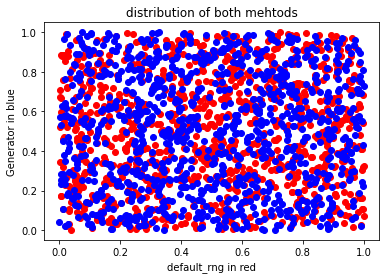

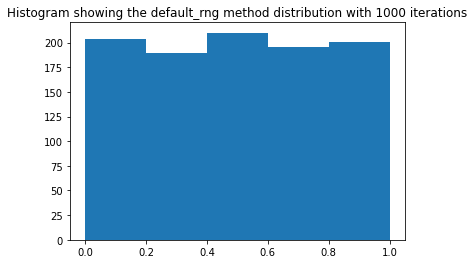

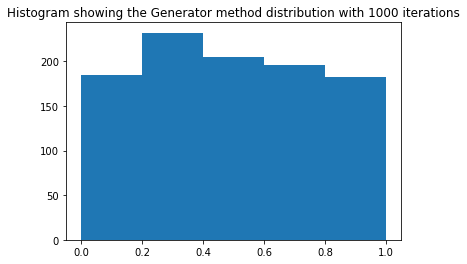

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Generate 1000 random numbers per method
ls = [default_rng(s).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('default_rng 10 first list numbers: ',[ls[i] for i in range(0,10)])

ls2 = [Generator(PCG64(s)).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('Generator list 10 first list numbers: ',[ls2[i] for i in range(0,10)])




x = ls #np.random.rand(N)
y = ls2 #np.random.rand(N)

plt.scatter(x, y, color='r')
plt.scatter(y, x, color='b')
print('______________________________________________________________')
print('-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods')
print('-DEFAULT_RNG')
print('Maximum value of default_rng method: ',max(x))
print('Mean value of default_rng method: ',np.mean(x))
print('-Generator:')
print('Maximum value of Generator method: ',max(y))
print('Mean value of Generator method: ',np.mean(y))

plt.xlabel('default_rng in red')
plt.ylabel('Generator in blue');
plt.title('distribution of both mehtods')
plt.show()

a = np.array(x) 
plt.hist(a, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the default_rng method distribution with 1000 iterations") 
plt.show()

b = np.array(y) 
plt.hist(b, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the Generator method distribution with 1000 iterations") 
plt.show()

## B) Explanation of simple random data and permutations

### Sample random data functions

PLOTS REGARDING SIMPLE RANDOM VARIABLES IN ORDER TO SHED LIGHT ABOUT THE DIFFERENCE BETWEEN THEM
numpy.random.rand() definition


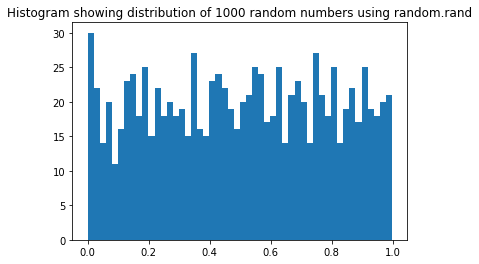

numpy.random.randn() definition


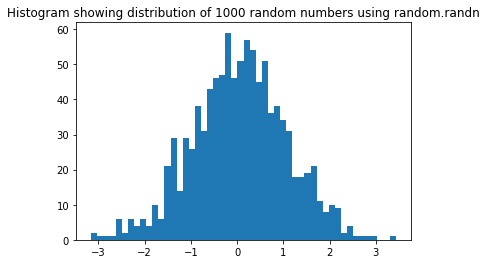

numpy.random.randint() definition


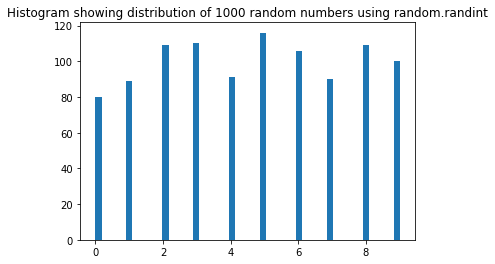

numpy.random.random_integers() definition


<ipython-input-4-cc00aa93a54c>:33: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  d = np.array(np.random.random_integers(0,10, size=1000))


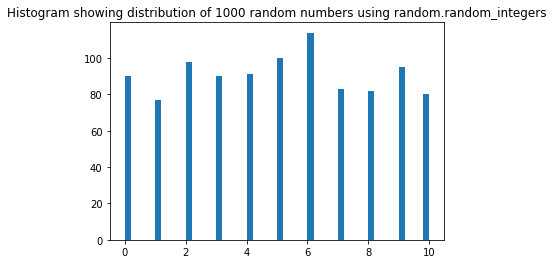

numpy.random.random_sample() definition
[0.9621725  0.97912549 0.277628  ]


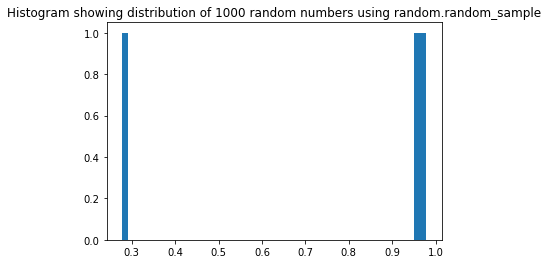

numpy.random.random() definition
[0.41500704 0.72500988 0.89486593]


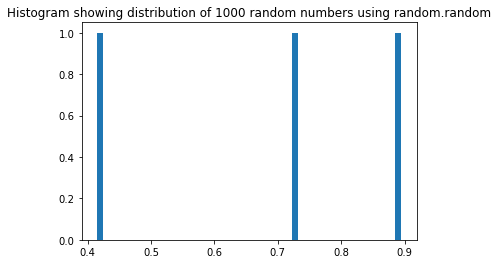

numpy.random.ranf() definition
[0.71131111 0.75813228 0.88340365]


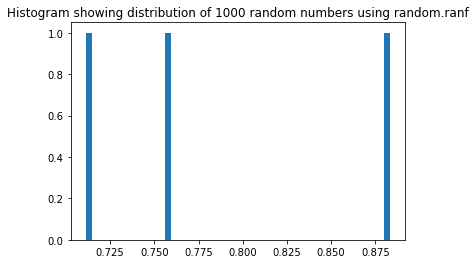

numpy.random.sample() definition
[0.36694824 0.54254494 0.53476998]


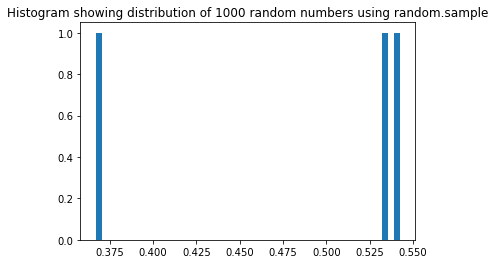

numpy.random.choice() definition
[0 4 3]


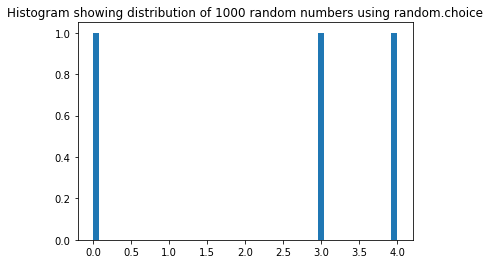

numpy.random.bytes() definition
string of random bytes defined in the function:  b'}\xed\xff\xc3E'


In [4]:
print('PLOTS REGARDING SIMPLE RANDOM VARIABLES IN ORDER TO SHED LIGHT ABOUT THE DIFFERENCE BETWEEN THEM')
# numpy.random.rand()
print('numpy.random.rand() definition')
a = np.array(np.random.rand(1000))

plt.hist(a, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.rand") 
plt.show()

# np.random.randn()
print('numpy.random.randn() definition')
b = np.array(np.random.randn(1000)) 
#print(max(b))
#print(min(b))
#print(b)
plt.hist(b, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randn") 
plt.show()

# numpy.random.randint()
print('numpy.random.randint() definition')
c = np.array(np.random.randint(0,10, size=1000))

plt.hist(c, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randint") 
plt.show()

# numpy.random.random_integers()
print('numpy.random.random_integers() definition')
d = np.array(np.random.random_integers(0,10, size=1000))

plt.hist(d, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random_integers") 
plt.show()

# numpy.random.random_sample()
print('numpy.random.random_sample() definition')
e = np.array(np.random.random_sample(3)) # By modifying the number within the sample we get the total numbers where we are going to get the continuous uniform
print(e)
plt.hist(e, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random_sample") 
plt.show()

# numpy.random.random()
print('numpy.random.random() definition')
f = np.array(np.random.random(3)) # 
print(f)
plt.hist(f, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random") 
plt.show()

# numpy.random.ranf()
print('numpy.random.ranf() definition')
g = np.array(np.random.ranf(3)) # 
print(g)
plt.hist(g, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.ranf") 
plt.show()

# numpy.random.sample()
print('numpy.random.sample() definition')
h = np.array(np.random.sample(3)) # 
print(h)
plt.hist(h, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.sample") 
plt.show()

# numpy.random.choice()
print('numpy.random.choice() definition')
i = np.array(np.random.choice(5,3)) # 
print(i)
plt.hist(i, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.choice") 
plt.show()

# numpy.random.bytes()
print('numpy.random.bytes() definition')
j = np.array(np.random.bytes(5)) # 
print('string of random bytes defined in the function: ',j)


## Permutations

#### SHUFFLE

In [28]:
arr = np.arange(10)
print('variable before shuffle',arr)
np.random.shuffle(arr)
print('print variable after shuffle',arr)

variable before shuffle [0 1 2 3 4 5 6 7 8 9]
print variable after shuffle [2 7 6 5 1 4 8 9 3 0]


In [33]:
print('Shuffle by reshaping :')
arr = np.arange(9).reshape((3, 3))
print('Variable in order,before shuffle\n',arr)
np.random.shuffle(arr)
print('Variable after shuffle\n',arr)
arr = np.arange(9).reshape((1, 9))
print('Variable in order,before shuffle\n',arr)
np.random.shuffle(arr)
print('Variable after shuffle\n',arr)
print('\nOUTPUT: As we can see, when a variable has been reshaped, it just shuffles each row of the variable after reshaping. \n')
print('If we try to have same output as without reshaping, shuffles function does not work')

Shuffle by reshaping :
Variable in order,before shuffle
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Variable after shuffle
 [[3 4 5]
 [0 1 2]
 [6 7 8]]
Variable in order,before shuffle
 [[0 1 2 3 4 5 6 7 8]]
Variable after shuffle
 [[0 1 2 3 4 5 6 7 8]]

OUTPUT: As we can see, when a variable has been reshaped, it just shuffles each row of the variable after reshaping. 

If we try to have same output as without reshaping, shuffles function does not work


#### PERMUTATION

In [39]:
arr = np.arange(10)
vperm= np.random.permutation(arr)
arr = np.arange(10)
n = np.random.shuffle(arr)
print('variable after shuffle',arr)
print('Variable using permutation',vperm)
print('It looks the same, the only difference I have found out is:')

print('shuffle output after saved in a variable: ', n)
print('permutation output after saved in a variable, as before: ',vperm)

variable after shuffle [9 1 3 4 5 8 7 2 0 6]
Variable using permutation [7 5 0 1 4 2 9 6 3 8]
It looks the same, the only difference I have found out is:
shuffle output after saved in a variable:  None
permutation output after saved in a variable, as before:  [7 5 0 1 4 2 9 6 3 8]


In [41]:
print('\nOUTPUT: even though both options are doing same thing, when it comes to save shuffle in a variable, we cannont do it.')


OUTPUT: even though both options are doing same thing, when it comes to save shuffle in a variable, we cannont do it.


## C) Distribution

### numpy.random.chisquare

output of the default example of the tutorial [1.48691649 0.53937831 0.84393101 0.25089381]
print by not assigning size to the function 2.7902038835121226
print 2 degrees of freedom first numbers of a size given of 10000 [0.8939180811664534, 5.20720604285745, 1.2011969223886225, 0.2523166066948553, 0.0735277598549164, 0.3561691558492705, 6.0012886878453084, 1.822630829751517, 5.243034163222577, 3.0675756649520842]


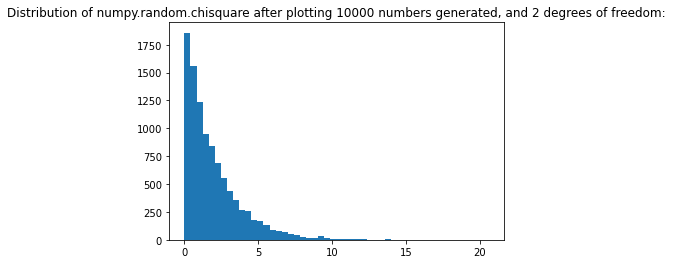

print 10k degrees of freedom first numbers of a size given of 10000 [10015.773067603273, 9875.261144519804, 9901.105225356649, 9836.668640674829, 9904.133597501455, 10132.217895607791, 10117.152419617028, 10090.427337307434, 9843.826013763568, 10058.278595413174]


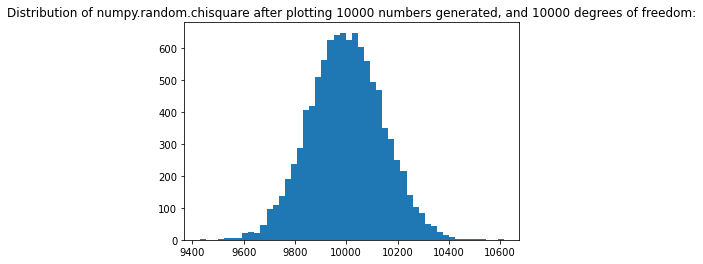


OUTPUT: After 1000 numbers generated, we can see in the plot they are generated following a chi-square pattern./n
Interesting to see as well, that if we tend to give a high amount of degrees of freedom to a large size, the result will be lead to have a normal distribution.


In [111]:
chi=np.random.chisquare(2,4)
print('output of the default example of the tutorial',chi)
chi=np.random.chisquare(2)
print('print by not assigning size to the function',chi)
chi=np.random.chisquare(2,10000)
print('print 2 degrees of freedom first numbers of a size given of 10000',[chi[i] for i in range(0,10)])
plt.hist(chi, bins = 50)
plt.title('Distribution of numpy.random.chisquare after plotting 10000 numbers generated, and 2 degrees of freedom:')
plt.show()
chi=np.random.chisquare(10000,10000)
print('print 10k degrees of freedom first numbers of a size given of 10000',[chi[i] for i in range(0,10)])
plt.hist(chi, bins = 50)
plt.title('Distribution of numpy.random.chisquare after plotting 10000 numbers generated, and 10000 degrees of freedom:')
plt.show()

print('\nOUTPUT: After 1000 numbers generated, we can see in the plot they are generated following a chi-square pattern./n')
print('Interesting to see as well, that if we tend to give a high amount of degrees of freedom to a large size, the result will be lead to have a normal distribution.')

### numpy.random.binomial

Mean of the distribution blue 2.9906
Mean of the distribution red 4.9912

OUTPUT : In case the probability of each trial is 0.5, the result will be generated following a normal distribution.

important to notice that the mean of the distribution will be the result of (nxp)


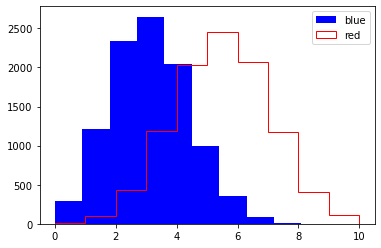

In [138]:


n, p = 10, 0.3 # number of trials, probability of each trial
s = np.random.binomial(n, p, 10000)
print('Mean of the distribution blue',s.mean())
plt.hist(s,color='b',label='blue')

n, p = 10, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 10000)
print('Mean of the distribution red',s.mean())
plt.hist(s,color='r',label='red',histtype='step')
plt.show

plt.legend()
print('\nOUTPUT : In case the probability of each trial is 0.5, the result will be generated following a normal distribution.\n')
print('important to notice that the mean of the distribution will be the result of (nxp)')